# 数字图像处理第一次作业

### 作业要求

1. 使用**适当的颜色空间**来处理图像，提升对比度
2. 使用**至少两种以上**的方法进行处理，并对结果进行分析和比较
3. 使用量化指标来展示结果



---



## 处理图像展示：


In [ ]:
!wget -q -O boat.jpg 'https://pic.imgdb.cn/item/66e2daced9c307b7e90e01f7.jpg'

#### 从图床下载后位置为：/content/boat.jpg

或者：
!wget -P /content/drive/MyDrive/image -O boat.jpg 'https://pic.imgdb.cn/item/66e2daced9c307b7e90e01f7.jpg'


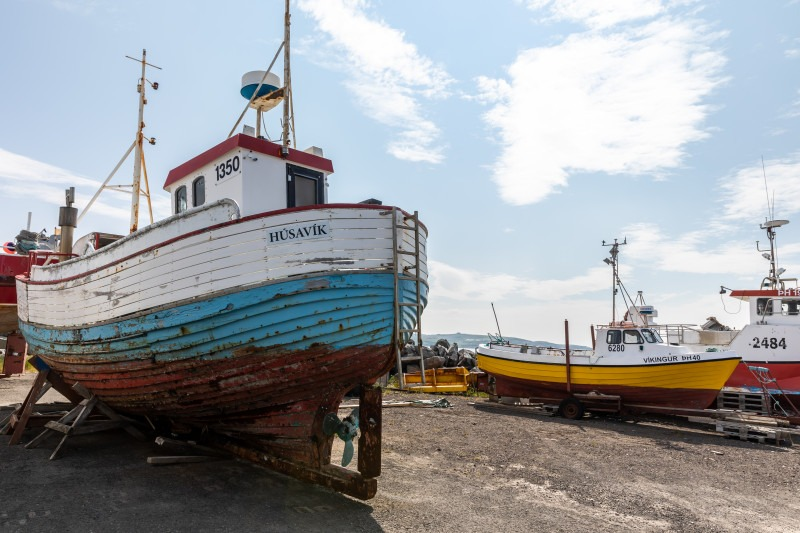

In [24]:
import cv2
from google.colab.patches import cv2_imshow

image_path = '/content/drive/MyDrive/image/boat.jpg'
original_image = cv2.imread(image_path)

# 显示原始图像
cv2_imshow(original_image)


## 方法一：线性对比度调整

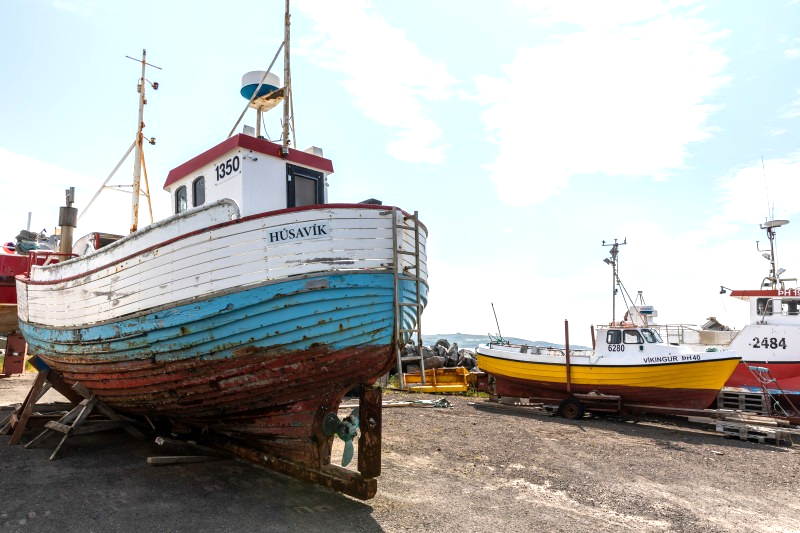

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

def adjust_contrast_brightness(image, alpha=1.0, beta=0):
    # alpha (对比度控制) 乘数因子
    # beta (亮度控制) 加数因子
    # 检查图像是否成功载入
    if image is None:
        print("Error")
        return None

    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

# 读取图像
image_path = '/content/drive/MyDrive/image/boat.jpg'
image = cv2.imread(image_path)

# 参数
alpha = 1.2

# 调整对比度和亮度
adjusted_image = adjust_contrast_brightness(image, alpha)

# 调整后的图像
cv2_imshow(adjusted_image)


## 方法二：直方图均衡化

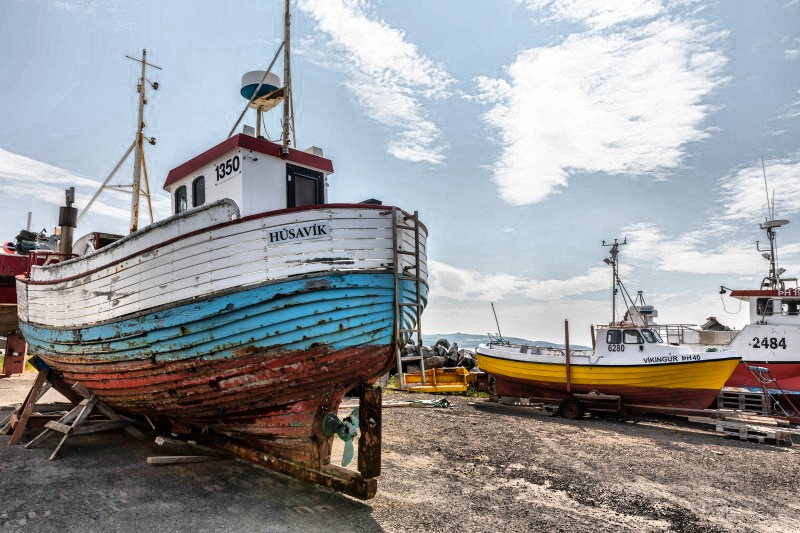

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# 图像路径
image_path = '/content/drive/MyDrive/image/boat.jpg'
img = cv2.imread(image_path)

# 检查图像是否成功载入
if img is None:
    print("Error")

# 转换到HSV颜色空间
image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 创建CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# 只对V通道亮度使用
image_hsv[:, :, 2] = clahe.apply(image_hsv[:, :, 2])

# 转换回BGR颜色空间
cl_img = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)

# 显示调整后的图像
cv2_imshow(cl_img)




---



## 问题：关于对比度的量化指标，可采用像素的方差来评价(思考为什么)。

**回答：**

由于对比度是表征图像中最亮与最暗的像素的差距，而像素的方差表示了像素值的差异很大。在高对比度图像中，亮部和暗部的像素值差异很大，方差大。在低对比度图像中，亮部和暗部的像素值差异很小，方差小。